# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [3]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym


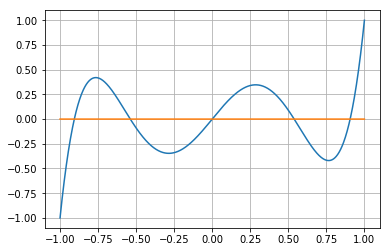

In [4]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [5]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.7
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b


In [6]:
# stopping criteria
eps = 1e-10
n_max = 1000

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

31
0.906179845915176
6.984918199393064e-11


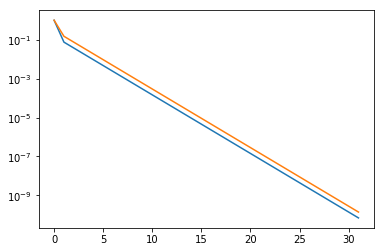

In [27]:
def bisect(f,a,b,eps,n_max):
    assert f(a)*f(b)<0 #run-time check for the condition to be true
    #(we put < and not <= because if we get the 0 we are happy 
    #and want to continue)
    a_new = a
    b_new = b
    x = mean([a,b]) #mid-point for bisection
    err = eps + 1.
    errors = [err] #"err" is the residual 
    it = 0
    sequence = [err]
    while (err > eps and it < n_max): #we have 2 stopping criterions
        if ( f(a_new) * f(x) < 0 ):
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new,b_new])
        
        err = 0.5 *(b_new -a_new)
        #err = abs(f(x_new))
        #err = abs(x-x_new)
        ek = (b-a)/(2**(it+1))
        
        sequence.append(ek)
        errors.append(err) #in the end, you want the list of 
        #all the errors
        x = x_new
        it += 1
        
    
    semilogy(errors) #plot log y
    semilogy(sequence) #plot log y
    print (it)
    print (x)
    print (err)
    return errors,sequence
              
errors_bisect,sequence = bisect(f,a,b,eps,n_max)


             
        

In [28]:
print(sequence)
print(errors_bisect)

[1.0000000001, 0.07500000000000001, 0.03750000000000003, 0.018750000000000044, 0.009375000000000022, 0.004687500000000011, 0.002343749999999978, 0.001171874999999989, 0.0005859375000000222, 0.0002929687500000111, 0.0001464843749999778, 7.32421874999889e-05, 3.6621093750022204e-05, 1.8310546875011102e-05, 9.155273437477796e-06, 4.577636718738898e-06, 2.2888183593972045e-06, 1.1444091796986022e-06, 5.722045898770567e-07, 2.861022949662839e-07, 1.4305114748314196e-07, 7.152557374157098e-08, 3.5762786843029915e-08, 1.7881393421514957e-08, 8.940696738513054e-09, 4.470348369256527e-09, 2.235174212383839e-09, 1.1175871339474952e-09, 5.587935669737476e-10, 2.793967834868738e-10, 1.3969836398786128e-10, 6.984918199393064e-11] [1.0000000001, 0.15000000000000002, 0.07500000000000001, 0.037500000000000006, 0.018750000000000003, 0.009375000000000001, 0.004687500000000001, 0.0023437500000000003, 0.0011718750000000002, 0.0005859375000000001, 0.00029296875000000004, 0.00014648437500000002, 7.324218750

In [8]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

6
0.906179845938664
7.771561172376096e-16
CPU times: user 17.3 ms, sys: 482 µs, total: 17.8 ms
Wall time: 17.3 ms


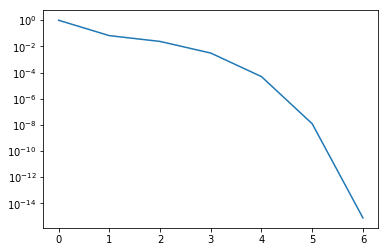

In [33]:
#we need to provide an initial guess that is x0

def newton(f,f_prime,x0,eps,n_max):
    #err = abs(f(x0))
    err = eps + 1.
    errors = [err] #"err" is the residual 
    it = 0
    x = x0
    sequence = [x]
    while (err > eps and it < n_max): #we have 2 stopping criterions
        
        
        qk = f_prime(x)
        #if abs(qk) < 1e-12:
        #    raise RuntimeError("f_prime(x) is close to zero")
        
        #there are some theorem that can tell you how far you are from a root
            
        x_new = x - f(x)/qk
        
        #err = abs(f(x_new))
        err = abs(x-x_new)
                
        sequence.append(x_new)
        errors.append(err) #in the end, you want the list of all the errors
        x = x_new
        it += 1
        
    
    semilogy(errors) #plot log y
    #semilogy(sequence) #plot log y
    print (it)
    print (x)
    print (err)
    return errors,sequence
              
%time errors_newton, sequence = newton(f,f_prime,1.0,eps,n_max)

In [32]:
print(sequence)
print(errors_newton)

[1.0, 0.9333333333333333, 0.9093264322119011, 0.9062289457968719, 0.9061798581501155, 0.9061798459386647, 0.906179845938664]
[1.0000000001, 0.06666666666666665, 0.024006901121432223, 0.0030974864150292714, 4.908764675637389e-05, 1.2211450739485485e-08, 7.771561172376096e-16]


## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

30
0.9061798459159386
6.730749291250504e-11


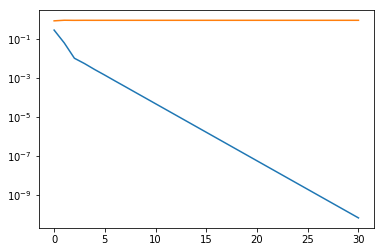

In [37]:
def chord(f,a,b,x0,eps,n_max):
    err = abs(f(x0))
    q = (f(b)-f(a))/(b-a) #you do not compute qk and rely on an approx of the derivative computed once and for all
    errors = [err] #"err" is the residual 
    it = 0
    x = x0
    sequence = [x]
    while (err > eps and it < n_max): #we have 2 stopping criterions
                
        #if abs(qk) < 1e-12:
        #    raise RuntimeError("f_prime(x) is close to zero")
        
        #there are some theorem that can tell you how far you are from a root
            
        x_new = x - f(x)/q
        
        #err = abs(f(x_new))
        err = abs(x-x_new)
                
        sequence.append(x_new)
        errors.append(err) #in the end, you want the list of all the errors
        x = x_new
        it += 1
        
    
    semilogy(errors) #plot log y
    semilogy(sequence) #plot log y
    print (it)
    print (x)
    print (err)
    return errors,sequence

errors_chord,sequence = chord (f,a,b,x0,eps,n_max)

In [38]:
print(sequence)
print(errors_chord)

[0.85, 0.9127742474996772, 0.9024821876574628, 0.9079607282060224, 0.9052477210826979, 0.9066483538475443, 0.9059393466198364, 0.9063019966211504, 0.9061174662474133, 0.9062116138209872, 0.9061636447440002, 0.9061881023856925, 0.9061756367463274, 0.9061819914118867, 0.9061787522622559, 0.9061804034240382, 0.9061795617616976, 0.9061799907954297, 0.9061797720986975, 0.9061798835780709, 0.9061798267522073, 0.9061798557188341, 0.9061798409532844, 0.906179848479929, 0.9061798446432703, 0.9061798465989825, 0.9061798456020709, 0.9061798461102404, 0.906179845851204, 0.9061798459832461, 0.9061798459159386]
[0.2856644140624999, 0.0627742474996772, 0.010292059842214374, 0.005478540548559563, 0.0027130071233244513, 0.0014006327648463657, 0.0007090072277078363, 0.00036265000131396885, 0.0001845303737371129, 9.414757357395498e-05, 4.796907698700892e-05, 2.4457641692232635e-05, 1.246563936507794e-05, 6.354665559316075e-06, 3.239149630851479e-06, 1.6511617823011804e-06, 8.416623406004575e-07, 4.290337

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

7
0.906179845938664
0.0


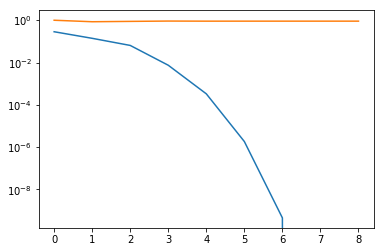

In [40]:
def secant(f,x0,x00,eps,n_max):
    err = abs(f(x0))
    errors = [err] #"err" is the residual 
    it = 0
    x = x0 #x_k
    xx = x00 #x_{k-1}
    sequence = [xx,x]
    while (err > eps and it < n_max): #we have 2 stopping criterions
       
        qk = (f(x) - f(xx))/(x-xx)        
        x_new = x - f(x)/qk
        
        err = abs(f(x_new))
        #err = abs(x-x_new)
                
        sequence.append(x_new)
        errors.append(err) #in the end, you want the list of all the errors
        xx = x
        x = x_new
        it += 1
        
    
    semilogy(errors) #plot log y
    semilogy(sequence) #plot log y
    print (it)
    print (x)
    print (err)
    return errors,sequence

    
errors_secant,sequence = secant(f,x0,x00,eps,n_max)

In [41]:
print(sequence)
print(errors_secant)

[1.0, 0.85, 0.8833288077671658, 0.9151263306896857, 0.9050936121989175, 0.9061319162699262, 0.9061801107822153, 0.9061798458743331, 0.906179845938664]
[0.2856644140624999, 0.13947386038960632, 0.06429196193779006, 0.007421784531796688, 0.0003292128414367294, 1.8195659591646894e-06, 4.4197499044023594e-10, 0.0]


## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

11
0.5384693101084483
6.708269298482029e-12


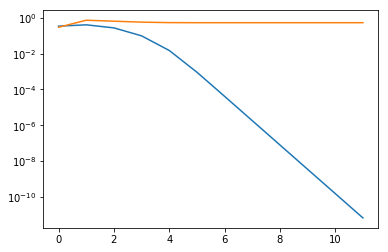

In [43]:
def fixed_point(phi,x0,eps,n_max):
    err = abs(f(x0))
    errors = [err] #"err" is the residual 
    it = 0
    x = x0
    sequence = [x]
    while (err > eps and it < n_max): #we have 2 stopping criterions
       
        x_new = phi(x)
        
        err = abs(f(x_new))
        #err = abs(x-x_new)
                
        sequence.append(x_new)
        errors.append(err) #in the end, you want the list of all the errors
        x = x_new
        it += 1
        
    
    semilogy(errors) #plot log y
    semilogy(sequence) #plot log y
    print (it)
    print (x)
    print (err)
    return errors,sequence

errors_fixed, sequence = fixed_point(phi,0.3,eps,n_max)
        

In [44]:
print(sequence)
print(errors_fixed)

[0.3, 0.7385857142857143, 0.652744328871195, 0.5785906280442237, 0.544681884018545, 0.5388502251896441, 0.538486410708249, 0.5384700602312162, 0.5384693429756083, 0.5384693115459513, 0.5384693101687915, 0.5384693101084483]
[0.34538625, 0.4097383156173344, 0.2764566862829656, 0.09932590855270443, 0.015138610786117468, 0.000924323877982667, 4.1484702187244065e-05, 1.8197223418615837e-06, 7.973879327768394e-08, 3.493931279475883e-09, 1.5309395400894405e-10, 6.708269298482029e-12]


## Comparison

In [ ]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()

In [ ]:
# Let's compare the scipy implmentation of Newton's method with our..

In [ ]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)